# Telecom Churn Case Study

## Business Understanding :
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Aim :
To analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

## Flow of Analysis
1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Data Preparation
5. Building Various Models 
    a. Logistic Regression
    b. Decision Tree
    c. Random Forest
6. Compare above models and select the best model
7. Conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [152]:
# import required libraries
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score

In [3]:
# Load the dataset to the pandas dataframe
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.shape

(99999, 226)

Given dataset has 226 columns and 99999 rows. 

## Data Understanding & Cleaning

In [5]:
data.isnull().sum()/data.shape[0]*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

### Imputing Missing values

In [7]:
# Select all categorical columns 
categorical_columns=['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                     'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

columns_date=[]
for col in data.columns:
    if "date" in col :
        columns_date.append(col)


recharge_columns=[]
for col in data.columns:
    if "rech" in col and "date" not in col :
        recharge_columns.append(col)



In [8]:
data[recharge_columns].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64

In [9]:
data[recharge_columns].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [10]:
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(),["total_rech_data_6", "date_of_last_rech_data_6","total_rech_data_7", "date_of_last_rech_data_7"]]

,total_rech_data_6,date_of_last_rech_data_6,total_rech_data_7,date_of_last_rech_data_7
1,NaN,NaN,1.0,7/25/2014
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
...,...,...,...,...
99991,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN


Here, we can see that the date of recharge and amount of recharge is missing. Therefore, we can assume that there was no recharge on the given month and can impute the missing value with 0 .

In [11]:
data[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6', 'max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',        
    ]]=data[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6', 'max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',        
    ]].fillna(0)

In [12]:
data[recharge_columns].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6         0
total_rech_data_7         0
total_rech_data_8         0
total_rech_data_9         0
max_rech_data_6           0
max_rech_data_7           0
max_rech_data_8           0
max_rech_data_9           0
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6        0
av_rech_amt_data_7        0
av_rech_amt_data_8        0
av_rech_amt_data_9        0
dtype: int64

### Replacing missing values in categorical columns with -1 

In [13]:
data[categorical_columns]

,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,NaN
1,NaN,1.0,1.0,NaN,NaN,0.0,0.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
99997,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [14]:
data[categorical_columns]=data[categorical_columns].apply(lambda x:x.fillna(-1))

In [15]:
data[categorical_columns].isnull().sum()

fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
dtype: int64

In [16]:
# Drop columns having more than 70% missing values
columns_to_be_dropped=data.columns [data.isnull().sum()/data.shape[0]*100>70]

In [17]:
data=data.drop(columns_to_be_dropped,axis=1)

In [18]:
data['last_date_of_month_7'].fillna('7/31/2014',inplace = True)
data['last_date_of_month_8'].fillna('8/31/2014',inplace = True)
data['last_date_of_month_9'].fillna('9/30/2014',inplace = True)

In [19]:
data['std_og_t2o_mou'].nunique()

1

In [20]:
cols_rest=data.columns [data.isnull().sum()/data.shape[0]*100>0]

In [21]:
# Dropping columns having only 1 value in the dataset
for i in cols_rest:
    if data[i].nunique()==1:
        print('Dropping column :', i)
        data.drop(i,axis=1,inplace=True)

Dropping column : loc_og_t2o_mou
Dropping column : std_og_t2o_mou
Dropping column : loc_ic_t2o_mou
Dropping column : std_og_t2c_mou_6
Dropping column : std_og_t2c_mou_7
Dropping column : std_og_t2c_mou_8
Dropping column : std_og_t2c_mou_9
Dropping column : std_ic_t2o_mou_6
Dropping column : std_ic_t2o_mou_7
Dropping column : std_ic_t2o_mou_8
Dropping column : std_ic_t2o_mou_9


In [22]:
cols_rest=data.columns [data.isnull().sum()/data.shape[0]*100>0]

In [23]:
for i in cols_rest:
    
    if data[i].mode()[0]==0:
        print('Imputing column {} with mode 0'.format(i))
        data[i].fillna(0,inplace=True)

Imputing column onnet_mou_6 with mode 0
Imputing column onnet_mou_7 with mode 0
Imputing column onnet_mou_8 with mode 0
Imputing column onnet_mou_9 with mode 0
Imputing column offnet_mou_6 with mode 0
Imputing column offnet_mou_7 with mode 0
Imputing column offnet_mou_8 with mode 0
Imputing column offnet_mou_9 with mode 0
Imputing column roam_ic_mou_6 with mode 0
Imputing column roam_ic_mou_7 with mode 0
Imputing column roam_ic_mou_8 with mode 0
Imputing column roam_ic_mou_9 with mode 0
Imputing column roam_og_mou_6 with mode 0
Imputing column roam_og_mou_7 with mode 0
Imputing column roam_og_mou_8 with mode 0
Imputing column roam_og_mou_9 with mode 0
Imputing column loc_og_t2t_mou_6 with mode 0
Imputing column loc_og_t2t_mou_7 with mode 0
Imputing column loc_og_t2t_mou_8 with mode 0
Imputing column loc_og_t2t_mou_9 with mode 0
Imputing column loc_og_t2m_mou_6 with mode 0
Imputing column loc_og_t2m_mou_7 with mode 0
Imputing column loc_og_t2m_mou_8 with mode 0
Imputing column loc_og_t2

In [24]:
data.isnull().sum()

mobile_number              0
circle_id                  0
last_date_of_month_6       0
last_date_of_month_7       0
last_date_of_month_8       0
last_date_of_month_9       0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
onnet_mou_9                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
offnet_mou_9               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_ic_mou_9              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
roam_og_mou_9              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2t_mou_9           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou_7           0
loc_og_t2m_mou_8           0
loc_og_t2m_mou_9           0
loc_og_t2f_mou

In [25]:
data.shape

(99999, 195)

In [26]:
# dropping date columns
col_dates=[]
for col in list(data.columns):
    if ('date' in col):
        col_dates.append(col)
data=data.drop(col_dates, axis=1)
data.shape

(99999, 187)

In [27]:
for col in data.columns:
    data=data[~np.isnan(data[col])]

In [28]:
data.shape

(99999, 187)

## Filter High Value Customers

In [29]:
data['total_rech_data_amt_6']=data['av_rech_amt_data_6']*data['total_rech_data_6']
data['total_rech_data_amt_7']=data['av_rech_amt_data_7']*data['total_rech_data_7']

In [30]:
data['total_rech_6']=data['total_rech_amt_6']+data['total_rech_data_amt_6']
data['total_rech_7']=data['total_rech_amt_7']+data['total_rech_data_amt_7']

In [31]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.total_rech_6 + data.total_rech_7)/2

In [32]:
data_1=data[ data['av_amt_data_6_7']>=np.quantile(data['av_amt_data_6_7'],0.7) ]

In [33]:
data_1.shape

(30001, 192)

In [34]:
# delete variables created to filter high-value customers
data_1 = data_1.drop(['total_rech_data_amt_6', 'total_rech_data_amt_7',
                                      'total_rech_6', 'total_rech_7', 'av_amt_data_6_7'], axis=1)
data_1.shape

(30001, 187)

## Derive Churn

In [35]:
# Calculate total incoming and outgoing minutes of usage
data_1['total_mou_9']=data_1['total_og_mou_9']+ data_1['total_ic_mou_9']



In [36]:
# Calculate 2g and 3g data consumption
data_1['Total_data_mb_9']=data_1['vol_2g_mb_9'] + data_1['vol_3g_mb_9']   

In [37]:
# Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

data_1['Churn']=data_1.apply(lambda x: 1 if (x.Total_data_mb_9==0 and x.total_mou_9==0)  else 0, axis=1)

In [38]:
data_1.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_9,Total_data_mb_9,Churn
0,7000842753,109,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,0.00,0.00,1
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,

In [39]:
# Check Churn percentage
data_1['Churn'].value_counts()/data_1.shape[0]*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

In [40]:
# Drop columns that are used to calculate above variables
data_1=data_1.drop(['total_mou_9','Total_data_mb_9'], axis=1)

In [41]:
# Delete columns that belong to the churn month
col_belong_to_9=[]
for col in data_1.columns:
    if '9' in col :
        col_belong_to_9.append(col)

In [42]:
# Take a copy of data before dropping coluns related to 9th month
data_copy=data_1.copy()
data_1=data_1.drop(col_belong_to_9,axis=1)

In [43]:
data_copy.shape

(30001, 188)

In [44]:
data_1.shape

(30001, 143)

In [45]:

categorical_columns=[i for i in categorical_columns if i not in col_belong_to_9]
categorical_columns.append('Churn')
numerical_col=[i for i in data_1.columns if i not in categorical_columns]


### Visualize data

In [46]:
# change columns types
data_1[numerical_col] = data_1[numerical_col].apply(pd.to_numeric)
data_1[categorical_columns]=data_1[categorical_columns].apply(lambda column: column.astype("category"), axis=0)


In [47]:
# Univariate Analysis
def univariate_analysis(col):
    if col in numerical_col:
        sns.distplot(data_1[col])
    elif col in categorical_columns:
        sns.countplot(data_1[col])

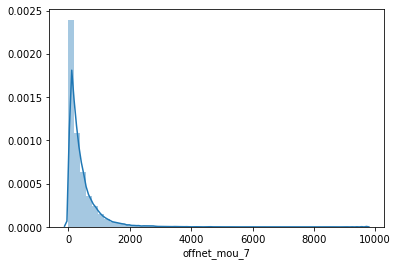

In [48]:
univariate_analysis('offnet_mou_7')

Variable offnet_mou_7 is skewed 

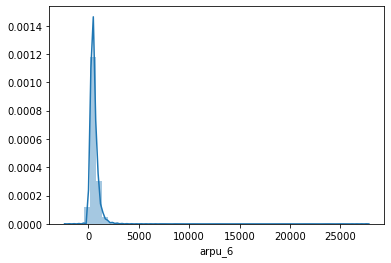

In [49]:
univariate_analysis('arpu_6')

Variable arpu_6 is skewed .

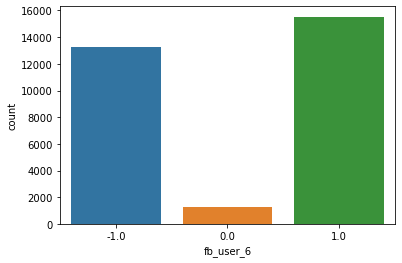

In [50]:
univariate_analysis('fb_user_6')

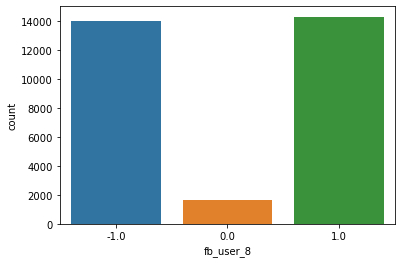

In [51]:
univariate_analysis('fb_user_8')

In [52]:
# Bivariate Analysis
def bivariate_analysis(col1,col2):
    if col1 in numerical_col and col2 in numerical_col:
        sns.regplot(data_1[col1],data_1[col2])
    elif (col1 in numerical_col and col2 in categorical_columns) or (col2 in numerical_col and col1 in categorical_columns):
        sns.boxplot(data_1[col1],data_1[col2])

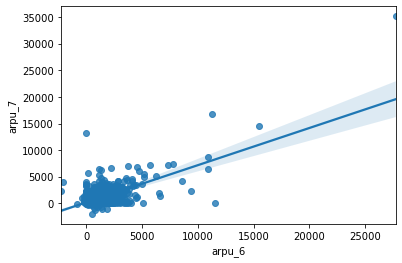

In [53]:
bivariate_analysis('arpu_6','arpu_7')

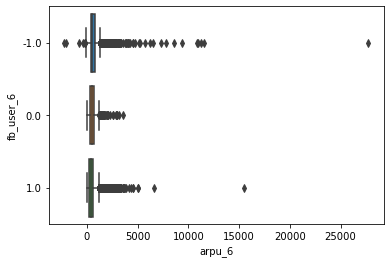

In [54]:
bivariate_analysis('arpu_6','fb_user_6')

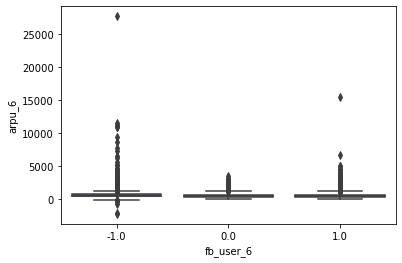

In [55]:
bivariate_analysis('fb_user_6','arpu_6')

### Derive some new feautres from the existing columns

In [56]:
col_list = []

for col in numerical_col:
    if '_6' in col or '_7' in col :
        col_list.append(col)



In [57]:
col_list = data_1.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb',
       'vol_3g_mb', 'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g',
       'sachet_3g', 'fb_user'],
      dtype='object')

In [58]:
col_to_drop=[]
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    
    if col_6 in numerical_col:
        col_to_drop.append(col_6)
        col_to_drop.append(col_7)
        data_1[avg_col_name] = (data_1[col_6]  + data_1[col_7])/ 2

In [59]:
data_1.shape

(30001, 186)

In [60]:
# we dont need columns from which we have derived new features, we will drop those columns
print ("dimension of the updated dataset after creating dervied features:",data_1.shape)
#col_to_drop = data_1.filter(regex='_6|_7').columns
data_1.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",data_1.shape)

dimension of the updated dataset after creating dervied features: (30001, 186)
dimension of the dataset after dropping un-necessary columns: (30001, 100)


In [61]:
# Drop column mobile_number and circle_id
data_1=data_1.drop(['circle_id','mobile_number'],axis=1)

In [62]:
data_1.shape

(30001, 98)

In [63]:
# lets now conevrt AON in months
data_1['aon_mon'] = data_1['aon']/30
data_1.drop('aon', axis=1, inplace=True)
data_1['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

### Let's plot Churn vs other variables

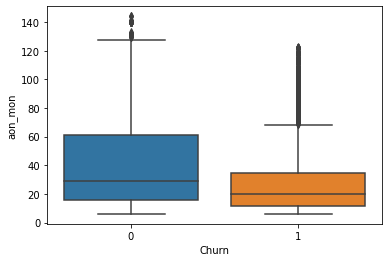

In [64]:
sns.boxplot(x = data_1.Churn, y = data_1.aon_mon)

In [65]:
data_1.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_

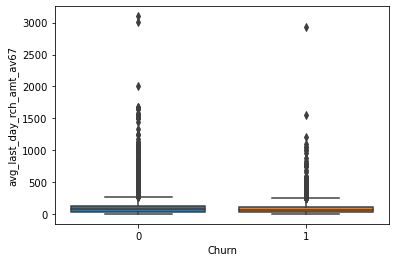

In [66]:
sns.boxplot(x = data_1.Churn, y = data_1.avg_last_day_rch_amt_av67)

Text(0.5, 1.0, 'Churn Vs Base Cost')

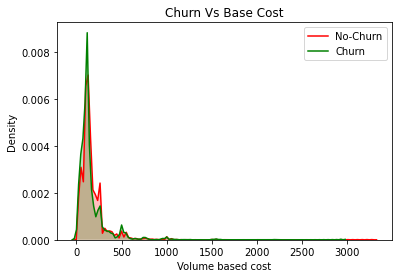

In [67]:
# churn Vs Base Cost
ax = sns.kdeplot(data_1.avg_max_rech_amt_av67[(data_1["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_1.avg_max_rech_amt_av67[(data_1["Churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

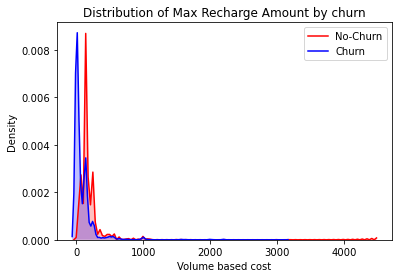

In [68]:
# churn vs max rechare amount
ax = sns.kdeplot(data_1.max_rech_amt_8[(data_1["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_1.max_rech_amt_8[(data_1["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

In [69]:
# Update the numerical_col array 
numerical_col=[i for i in data_1.columns if i not in categorical_columns]


In [70]:
### Cap outliers in all numeric variables
def cap_outliers(col_name,k=2):
    
    lower=col_name.mean()-2*col_name.std()
    upper=col_name.mean()+2*col_name.std()
    
    
    col_name[col_name<lower] = lower
    col_name[col_name>upper] = upper
    return col_name
    

In [71]:
data_1[numerical_col]=data_1[numerical_col].apply(cap_outliers,axis=0)

In [72]:

# change churn to numeric
data_1['Churn'] = pd.to_numeric(data_1['Churn'])

In [73]:
# Train-Test split
X = data_1.drop(['Churn'], axis=1)
y = data_1['Churn']



In [74]:
X.shape

(30001, 97)

In [75]:
# split the dateset into train and test datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 97)
Dimension of X_test: (9001, 97)


In [76]:
# apply scaling on the dataset


scaler = StandardScaler()
X_train[numerical_col]=scaler.fit_transform(X_train[numerical_col])


In [77]:
X_train.shape

(21000, 97)

In [78]:
#Aggregating the categorical columns
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').Churn.mean())
print(train.groupby('night_pck_user_7').Churn.mean())
print(train.groupby('night_pck_user_8').Churn.mean())
print(train.groupby('fb_user_6').Churn.mean())
print(train.groupby('fb_user_7').Churn.mean())
print(train.groupby('fb_user_8').Churn.mean())

night_pck_user_6
-1.0    0.097337
 0.0    0.066789
 1.0    0.088136
Name: Churn, dtype: float64
night_pck_user_7
-1.0    0.113402
 0.0    0.055655
 1.0    0.060284
Name: Churn, dtype: float64
night_pck_user_8
-1.0    0.140112
 0.0    0.028431
 1.0    0.033195
Name: Churn, dtype: float64
fb_user_6
-1.0    0.097337
 0.0    0.080702
 1.0    0.066276
Name: Churn, dtype: float64
fb_user_7
-1.0    0.113402
 0.0    0.064103
 1.0    0.055058
Name: Churn, dtype: float64
fb_user_8
-1.0    0.140112
 0.0    0.062943
 1.0    0.024685
Name: Churn, dtype: float64


In [79]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.097337, 0: 0.066789, 1: 0.088136},
           'night_pck_user_7' : {-1: 0.113402, 0: 0.055655, 1: 0.060284},
           'night_pck_user_8' : {-1: 0.140112, 0: 0.028431, 1: 0.033195},
           'fb_user_6'        : {-1: 0.097337, 0: 0.080702, 1: 0.066276},
           'fb_user_7'        : {-1: 0.113402, 0: 0.064103, 1: 0.055058},
           'fb_user_8'        : {-1: 0.140112, 0: 0.062943, 1: 0.024685}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

    

In [80]:

smt_tmk = SMOTETomek(random_state=42)
X_tr,y_tr = smt_tmk.fit_resample(X_train,y_train)

In [81]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (38612, 97)
Dimension of y_tr Shape: (38612,)
Imbalance in Training dataset: 1.0


## Model Building 

In [82]:
lr = LogisticRegression()
rfe = RFE(lr, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [83]:
rfe_features = list(X_tr.columns[rfe.support_])
print("20 most important features selected by RFE ", rfe_features)

20 most important features selected by RFE  ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'sachet_2g_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_loc_ic_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67', 'avg_loc_ic_mou_av67', 'aon_mon']


In [84]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [85]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [86]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)



print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

Accuracy on the test dataset: 0.7994667259193423


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8251
           1       0.27      0.81      0.40       750

    accuracy                           0.80      9001
   macro avg       0.62      0.80      0.64      9001
weighted avg       0.92      0.80      0.84      9001



The model is having 80% accuracy with 20 features.

In [88]:
# Now we will reduce the no of features to 18 and observe the model performance
lr = LogisticRegression()
rfe = RFE(lr, 18)   
rfe = rfe.fit(X_tr, y_tr)

rfe_features = list(X_tr.columns[rfe.support_])
print("18 most important features selected by RFE ", rfe_features)

X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

# lets create a Logisctic Regression model on the seleted columns by RFE

lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

18 most important features selected by RFE  ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_loc_ic_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67', 'avg_loc_ic_mou_av67']


LogisticRegression(random_state=1)

In [89]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
print(classification_report(y_test, y_pred))


Accuracy on the test dataset: 0.7228085768247973
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      8251
           1       0.21      0.85      0.34       750

    accuracy                           0.72      9001
   macro avg       0.60      0.78      0.58      9001
weighted avg       0.92      0.72      0.78      9001



The accuracy reduced to 72 % with 18 features

In [90]:
# Now we will increase the no of features to 22 and observe the model performance
lr = LogisticRegression()
rfe = RFE(lr, 22)   
rfe = rfe.fit(X_tr, y_tr)

rfe_features = list(X_tr.columns[rfe.support_])
print("22 most important features selected by RFE ", rfe_features)

X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

# lets create a Logisctic Regression model on the seleted columns by RFE

lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)

print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
print(classification_report(y_test, y_pred))

22 most important features selected by RFE  ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'sachet_2g_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_loc_ic_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67', 'avg_loc_ic_mou_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'aon_mon']
Accuracy on the test dataset: 0.7693589601155427
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      8251
           1       0.24      0.82      0.37       750

    accuracy                           0.77      9001
   macro avg       0.61      0.79      0.62      9001
weighted avg       0.92      0.77      0.82      9001



In [91]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
print(classification_report(y_test, y_pred))

Accuracy on the test dataset: 0.7693589601155427
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      8251
           1       0.24      0.82      0.37       750

    accuracy                           0.77      9001
   macro avg       0.61      0.79      0.62      9001
weighted avg       0.92      0.77      0.82      9001



By increasing the no of features to 22, the model accuracy did not imporve much. So, we will proceed with no of features 20 .

In [92]:
lr = LogisticRegression()
rfe = RFE(lr, 20)   
rfe = rfe.fit(X_tr, y_tr)

rfe_features = X_tr.columns[rfe.support_]
#print("20 most important features selected by RFE ", rfe_features)

X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

# lets create a Logisctic Regression model on the seleted columns by RFE

lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)

print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
print(classification_report(y_test, y_pred))

Accuracy on the test dataset: 0.7994667259193423
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8251
           1       0.27      0.81      0.40       750

    accuracy                           0.80      9001
   macro avg       0.62      0.80      0.64      9001
weighted avg       0.92      0.80      0.84      9001



In [93]:
### Build model with statsmodel
X_train_sm = sm.add_constant(X_tr[rfe_features])
logm2 = sm.GLM(y_tr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38612
Model:                            GLM   Df Residuals:                    38591
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14332.
Date:                Mon, 05 Jul 2021   Deviance:                       28664.
Time:                        11:02:15   Pearson chi2:                 1.11e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9269      0.028    -68.187      0.000      -1.982      -1.872
loc_og_t2t_mou_8           -0.4318      0.093     -4.662      0.000      -0.613      -0.250
loc_og_t2m_mou_8           -0.8669      0.116     -7.453      0.000      -1.095      -0.639
loc_og_mou_8                0.4896      0.161      3.036      0.002       0.174       0.806
total_og_mou_8             -0.4765      0.024    -20.159      0.000      -0.523      -0.430
loc_ic_t2t_mou_8           -0.9277      0.090    -10.336      0.000      -1.104      -0.752
loc_ic_t2m_mou_8           -1.6189      0.140    -11.553      0.000      -1.894      -1.344
loc_ic_t2f_mou_8           -0.4616      0.039    -11.818      0.000      -0.538      -0.385
loc_ic_mou_8                0.9283      0.184      5.057      0.000       0.569       1.288
spl_ic_mou_8               -0.5789      0.029    -20.249      0.000      -0.635      -0.523
total_rech_num_8           -0.5754      0.024    -24.369      0.000      -0.622      -0.529
last_day_rch_amt_8         -0.4745      0.019    -24.615      0.000      -0.512      -0.437
max_rech_data_8            -0.5966      0.020    -30.051      0.000      -0.636      -0.558
vol_2g_mb_8                -0.4164      0.027    -15.288      0.000      -0.470      -0.363
sachet_2g_8                -0.3619      0.025    -14.688      0.000      -0.410      -0.314
sep_vbc_3g                 -0.7569      0.053    -14.363      0.000      -0.860      -0.654
avg_arpu_av67               0.5921      0.020     29.934      0.000       0.553       0.631
avg_loc_ic_t2t_mou_av67     0.4466      0.066      6.817      0.000       0.318       0.575
avg_loc_ic_t2m_mou_av67     0.7709      0.105      7.334      0.000       0.565       0.977
avg_loc_ic_mou_av67        -0.5439      0.137     -3.962      0.000      -0.813      -0.275
aon_mon                    -0.3436      0.019    -18.223      0.000      -0.381      -0.307
===========================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_tr[rfe_features].columns
vif['VIF'] = [variance_inflation_factor(X_tr[rfe_features].values, i) for i in range(X_tr[rfe_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,61.21
2,loc_og_mou_8,42.82
18,avg_loc_ic_mou_av67,41.32
5,loc_ic_t2m_mou_8,35.51
17,avg_loc_ic_t2m_mou_av67,24.49
1,loc_og_t2m_mou_8,23.37
4,loc_ic_t2t_mou_8,10.88
0,loc_og_t2t_mou_8,10.18
16,avg_loc_ic_t2t_mou_av67,8.14
3,total_og_mou_8,2.54


In [95]:
# Dropping column loc_ic_mou_8 because of high VIF
rfe_features = rfe_features.drop('loc_ic_mou_8', 1)
X_train_sm = sm.add_constant(X_tr[rfe_features])
logm2 = sm.GLM(y_tr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38612
Model:                            GLM   Df Residuals:                    38592
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14343.
Date:                Mon, 05 Jul 2021   Deviance:                       28686.
Time:                        11:02:16   Pearson chi2:                 1.09e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9272      0.028    -68.000      0.000      -1.983      -1.872
loc_og_t2t_mou_8           -0.4902      0.092     -5.302      0.000      -0.671      -0.309
loc_og_t2m_mou_8           -0.9415      0.116     -8.116      0.000      -1.169      -0.714
loc_og_mou_8                0.5857      0.161      3.642      0.000       0.271       0.901
total_og_mou_8             -0.4812      0.024    -20.373      0.000      -0.528      -0.435
loc_ic_t2t_mou_8           -0.5498      0.048    -11.529      0.000      -0.643      -0.456
loc_ic_t2m_mou_8           -0.9634      0.051    -18.882      0.000      -1.063      -0.863
loc_ic_t2f_mou_8           -0.3734      0.036    -10.451      0.000      -0.443      -0.303
spl_ic_mou_8               -0.5797      0.029    -20.279      0.000      -0.636      -0.524
total_rech_num_8           -0.5750      0.024    -24.355      0.000      -0.621      -0.529
last_day_rch_amt_8         -0.4750      0.019    -24.653      0.000      -0.513      -0.437
max_rech_data_8            -0.5978      0.020    -30.120      0.000      -0.637      -0.559
vol_2g_mb_8                -0.4173      0.027    -15.318      0.000      -0.471      -0.364
sachet_2g_8                -0.3624      0.025    -14.713      0.000      -0.411      -0.314
sep_vbc_3g                 -0.7559      0.053    -14.365      0.000      -0.859      -0.653
avg_arpu_av67               0.5932      0.020     30.019      0.000       0.554       0.632
avg_loc_ic_t2t_mou_av67     0.3549      0.064      5.510      0.000       0.229       0.481
avg_loc_ic_t2m_mou_av67     0.6024      0.103      5.865      0.000       0.401       0.804
avg_loc_ic_mou_av67        -0.3169      0.135     -2.356      0.018      -0.581      -0.053
aon_mon                    -0.3469      0.019    -18.423      0.000      -0.384      -0.310
===========================================================================================
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_tr[rfe_features].columns
vif['VIF'] = [variance_inflation_factor(X_tr[rfe_features].values, i) for i in range(X_tr[rfe_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,42.15
17,avg_loc_ic_mou_av67,32.09
1,loc_og_t2m_mou_8,22.98
16,avg_loc_ic_t2m_mou_av67,19.64
0,loc_og_t2t_mou_8,10.03
15,avg_loc_ic_t2t_mou_av67,7.06
5,loc_ic_t2m_mou_8,4.89
4,loc_ic_t2t_mou_8,3.75
3,total_og_mou_8,2.54
8,total_rech_num_8,2.21


In [97]:
# Dropping column loc_og_mou_8 because of high VIF
rfe_features = rfe_features.drop('loc_og_mou_8', 1)
X_train_sm = sm.add_constant(X_tr[rfe_features])
logm2 = sm.GLM(y_tr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38612
Model:                            GLM   Df Residuals:                    38593
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14349.
Date:                Mon, 05 Jul 2021   Deviance:                       28698.
Time:                        11:02:18   Pearson chi2:                 1.07e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9250      0.028    -67.979      0.000      -1.980      -1.869
loc_og_t2t_mou_8           -0.1817      0.034     -5.271      0.000      -0.249      -0.114
loc_og_t2m_mou_8           -0.5443      0.038    -14.367      0.000      -0.619      -0.470
total_og_mou_8             -0.4784      0.024    -20.275      0.000      -0.525      -0.432
loc_ic_t2t_mou_8           -0.5704      0.048    -12.005      0.000      -0.664      -0.477
loc_ic_t2m_mou_8           -0.9705      0.051    -18.984      0.000      -1.071      -0.870
loc_ic_t2f_mou_8           -0.3616      0.036    -10.159      0.000      -0.431      -0.292
spl_ic_mou_8               -0.5803      0.029    -20.302      0.000      -0.636      -0.524
total_rech_num_8           -0.5792      0.024    -24.552      0.000      -0.625      -0.533
last_day_rch_amt_8         -0.4742      0.019    -24.604      0.000      -0.512      -0.436
max_rech_data_8            -0.5975      0.020    -30.100      0.000      -0.636      -0.559
vol_2g_mb_8                -0.4166      0.027    -15.300      0.000      -0.470      -0.363
sachet_2g_8                -0.3625      0.025    -14.716      0.000      -0.411      -0.314
sep_vbc_3g                 -0.7538      0.053    -14.340      0.000      -0.857      -0.651
avg_arpu_av67               0.5933      0.020     30.010      0.000       0.555       0.632
avg_loc_ic_t2t_mou_av67     0.3418      0.065      5.295      0.000       0.215       0.468
avg_loc_ic_t2m_mou_av67     0.5818      0.103      5.645      0.000       0.380       0.784
avg_loc_ic_mou_av67        -0.2893      0.135     -2.142      0.032      -0.554      -0.025
aon_mon                    -0.3483      0.019    -18.507      0.000      -0.385      -0.311
===========================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_tr[rfe_features].columns
vif['VIF'] = [variance_inflation_factor(X_tr[rfe_features].values, i) for i in range(X_tr[rfe_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,avg_loc_ic_mou_av67,31.80
15,avg_loc_ic_t2m_mou_av67,19.50
14,avg_loc_ic_t2t_mou_av67,7.02
4,loc_ic_t2m_mou_8,4.88
3,loc_ic_t2t_mou_8,3.73
1,loc_og_t2m_mou_8,3.10
2,total_og_mou_8,2.53
0,loc_og_t2t_mou_8,2.24
7,total_rech_num_8,2.21
5,loc_ic_t2f_mou_8,1.72


In [99]:
# Dropping column avg_loc_ic_mou_av67 because of high VIF
rfe_features = rfe_features.drop('avg_loc_ic_mou_av67', 1)
X_train_sm = sm.add_constant(X_tr[rfe_features])
logm2 = sm.GLM(y_tr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38612
Model:                            GLM   Df Residuals:                    38594
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14351.
Date:                Mon, 05 Jul 2021   Deviance:                       28703.
Time:                        11:02:19   Pearson chi2:                 1.08e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9229      0.028    -68.028      0.000      -1.978      -1.868
loc_og_t2t_mou_8           -0.1808      0.034     -5.257      0.000      -0.248      -0.113
loc_og_t2m_mou_8           -0.5363      0.038    -14.268      0.000      -0.610      -0.463
total_og_mou_8             -0.4775      0.024    -20.244      0.000      -0.524      -0.431
loc_ic_t2t_mou_8           -0.5722      0.047    -12.071      0.000      -0.665      -0.479
loc_ic_t2m_mou_8           -0.9688      0.051    -18.992      0.000      -1.069      -0.869
loc_ic_t2f_mou_8           -0.3916      0.033    -11.953      0.000      -0.456      -0.327
spl_ic_mou_8               -0.5796      0.029    -20.286      0.000      -0.636      -0.524
total_rech_num_8           -0.5782      0.024    -24.518      0.000      -0.624      -0.532
last_day_rch_amt_8         -0.4742      0.019    -24.605      0.000      -0.512      -0.436
max_rech_data_8            -0.5974      0.020    -30.096      0.000      -0.636      -0.558
vol_2g_mb_8                -0.4171      0.027    -15.312      0.000      -0.470      -0.364
sachet_2g_8                -0.3621      0.025    -14.700      0.000      -0.410      -0.314
sep_vbc_3g                 -0.7545      0.053    -14.352      0.000      -0.858      -0.651
avg_arpu_av67               0.5930      0.020     30.006      0.000       0.554       0.632
avg_loc_ic_t2t_mou_av67     0.2263      0.035      6.388      0.000       0.157       0.296
avg_loc_ic_t2m_mou_av67     0.3749      0.035     10.577      0.000       0.305       0.444
aon_mon                    -0.3475      0.019    -18.468      0.000      -0.384      -0.311
===========================================================================================
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_tr[rfe_features].columns
vif['VIF'] = [variance_inflation_factor(X_tr[rfe_features].values, i) for i in range(X_tr[rfe_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,4.88
3,loc_ic_t2t_mou_8,3.72
1,loc_og_t2m_mou_8,3.08
15,avg_loc_ic_t2m_mou_av67,3.07
14,avg_loc_ic_t2t_mou_av67,2.83
2,total_og_mou_8,2.53
0,loc_og_t2t_mou_8,2.24
7,total_rech_num_8,2.21
11,sachet_2g_8,1.54
8,last_day_rch_amt_8,1.53


In [101]:
rfe_features

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'vol_2g_mb_8', 'sachet_2g_8', 'sep_vbc_3g',
       'avg_arpu_av67', 'avg_loc_ic_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67',
       'aon_mon'],
      dtype='object')

In [102]:
arr=[]
for i in rfe_features:
    arr.append(X_test.columns.get_loc(i))


In [103]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, arr]
y_rfe = y_tr
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [104]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, arr]
y_pred = lr.predict(X_test_rfe)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
print(classification_report(y_test, y_pred))


Accuracy on the test dataset: 0.8313520719920009
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8251
           1       0.30      0.79      0.44       750

    accuracy                           0.83      9001
   macro avg       0.64      0.81      0.67      9001
weighted avg       0.92      0.83      0.86      9001



In [158]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
print('Accuracy on the test dataset:',round(lr.score(X_test_rfe, y_test),2))
print('AUC Score:', round(roc_auc_score(y_test, y_pred),2))
print('F1 Score:', round(f1_score(y_test, y_pred),2))
sens=round(sensitivity, 2)
spec=round(specificity, 2)
accu=round(lr.score(X_test_rfe, y_test),2)
auc=round(roc_auc_score(y_test, y_pred),2)
f1=round(f1_score(y_test, y_pred),2)
prec=round(precision_score(y_test, y_pred ),2)
rec=round(recall_score(y_test, y_pred),2)

Sensitivity: 	0.79
Specificity: 	0.83
Accuracy on the test dataset: 0.83
AUC Score: 0.81
F1 Score: 0.44


In [159]:
result=pd.DataFrame({'Algorithm':['Logistic Regression'],
                    'Sensitivity':[sens],
                     'Specificity':[spec],
                     'Accuracy':[accu],
                     'AUC':[auc],
                     'F1 Score':[f1],
                    'Precision':[prec],
                    'Recall':[rec]})
result


,Algorithm,Sensitivity,Specificity,Accuracy,AUC,F1 Score,Precision,Recall
0,Logistic Regression,0.79,0.83,0.83,0.81,0.44,0.3,0.79


## Decision Tree

In [114]:
dt = DecisionTreeClassifier(random_state=42)

In [115]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150,200],
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini", "entropy"]
}

In [116]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [117]:
%%time
grid_search.fit(X_tr, y_tr)

Fitting 4 folds for each of 140 candidates, totalling 560 fits
Wall time: 4min 15s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150, 200],
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [118]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.485983,0.006849,0.009096,0.008928,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.820263,0.833005,0.83228,0.831659,0.829302,0.00524,113
1,0.509967,0.003811,0.016276,0.000031,gini,2,5,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.820263,0.833005,0.83228,0.831659,0.829302,0.00524,113
2,0.494817,0.011101,0.003908,0.006768,gini,2,10,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.820263,0.833005,0.83228,0.831659,0.829302,0.00524,113
3,0.462028,0.005691,0.012701,0.007434,gini,2,10,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.820263,0.833005,0.83228,0.831659,0.829302,0.00524,113
4,0.462683,0.012205,0.004081,0.007068,gini,2,20,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.820263,0.833005,0.83228,0.831659,0.829302,0.00524,113


In [119]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=50, random_state=42)

In [120]:
dt_best = grid_search.best_estimator_

In [121]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_tr, dt_classifier.predict(X_tr)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_tr, dt_classifier.predict(X_tr)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [122]:
evaluate_model(dt_best)

Train Accuracy : 0.9525277115922511
Train Confusion Matrix:
[[18419   887]
 [  946 18360]]
--------------------------------------------------
Test Accuracy : 0.8381290967670258
Test Confusion Matrix:
[[7082 1169]
 [ 288  462]]


In [123]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8251
           1       0.28      0.62      0.39       750

    accuracy                           0.84      9001
   macro avg       0.62      0.74      0.65      9001
weighted avg       0.90      0.84      0.86      9001



In [160]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, dt_best.predict(X_test), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
print('Accuracy on the test dataset:',round(accuracy_score(y_test, dt_best.predict(X_test)),2))
print('AUC Score:', round(roc_auc_score(y_test, dt_best.predict(X_test)),2))
print('F1 Score:', round(f1_score(y_test, dt_best.predict(X_test)),2))
sens=round(sensitivity, 2)
spec=round(specificity, 2)
accu=round(accuracy_score(y_test, dt_best.predict(X_test)),2)
auc=round(roc_auc_score(y_test, dt_best.predict(X_test)),2)
f1=round(f1_score(y_test, dt_best.predict(X_test)),2)
prec=precision_score(y_test, dt_best.predict(X_test) )
rec=recall_score(y_test, dt_best.predict(X_test))

Sensitivity: 	0.62
Specificity: 	0.86
Accuracy on the test dataset: 0.84
AUC Score: 0.74
F1 Score: 0.39


In [161]:
tempresult=pd.DataFrame({'Algorithm':['Decision Tree'],
                    'Sensitivity':[sens],
                     'Specificity':[spec],
                     'Accuracy':[accu],
                     'AUC':[auc],
                     'F1 Score':[f1],
                    'Precision':[prec],
                    'Recall':[rec]})
result=pd.concat([result,tempresult])
result

,Algorithm,Sensitivity,Specificity,Accuracy,AUC,F1 Score,Precision,Recall
0,Logistic Regression,0.79,0.83,0.83,0.81,0.44,0.300000,0.790
0,Decision Tree,0.62,0.86,0.84,0.74,0.39,0.283262,0.616


## Random Forest

In [126]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [127]:
%%time
grid_search.fit(X_tr, y_tr)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 19min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [128]:
rf_best = grid_search.best_estimator_
print("Best AUC: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best AUC:  0.949549362892365
Best hyperparameters:  {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 200}


In [129]:
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [130]:
evaluate_model(rf_best)

Train Accuracy : 0.980368797265099
Train Confusion Matrix:
[[18748   558]
 [  200 19106]]
--------------------------------------------------
Test Accuracy : 0.938673480724364
Test Confusion Matrix:
[[8098  153]
 [ 399  351]]


In [131]:
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8251
           1       0.70      0.47      0.56       750

    accuracy                           0.94      9001
   macro avg       0.82      0.72      0.76      9001
weighted avg       0.93      0.94      0.93      9001



In [162]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, rf_best.predict(X_test), average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
print('Accuracy on the test dataset:',round(accuracy_score(y_test, rf_best.predict(X_test)),2))
print('AUC Score:', round(roc_auc_score(y_test, rf_best.predict(X_test)),2))
print('F1 Score:', round(f1_score(y_test, rf_best.predict(X_test)),2))
sens=round(sensitivity, 2)
spec=round(specificity, 2)
accu=round(accuracy_score(y_test, rf_best.predict(X_test)),2)
auc=round(roc_auc_score(y_test, rf_best.predict(X_test)),2)
f1=round(f1_score(y_test, rf_best.predict(X_test)),2)
prec=precision_score(y_test, rf_best.predict(X_test) )
rec=recall_score(y_test, rf_best.predict(X_test))

Sensitivity: 	0.47
Specificity: 	0.98
Accuracy on the test dataset: 0.94
AUC Score: 0.72
F1 Score: 0.56


In [163]:
tempresult=pd.DataFrame({'Algorithm':['Random Forest'],
                    'Sensitivity':[sens],
                     'Specificity':[spec],
                     'Accuracy':[accu],
                     'AUC':[auc],
                     'F1 Score':[f1],
                    'Precision':[prec],
                    'Recall':[rec]})
result=pd.concat([result,tempresult])
result

,Algorithm,Sensitivity,Specificity,Accuracy,AUC,F1 Score,Precision,Recall
0,Logistic Regression,0.79,0.83,0.83,0.81,0.44,0.300000,0.790
0,Decision Tree,0.62,0.86,0.84,0.74,0.39,0.283262,0.616
0,Random Forest,0.47,0.98,0.94,0.72,0.56,0.696429,0.468


Conclusions:
    1. Random forest algorithm with tuned hyperparametes is having highest accuracy.
    2. Logistic Regression algorithm is having highest sensitivity,specificity, recall and AUC (Area Under the curve).Therefore, we can conclude that Logistic Regression model is the most suitable algorithm for the case study.

In [204]:
# get importance
importance = lr.coef_[0]
lr_feature_importances=[]
# summarize feature importance
for i,v in enumerate(importance):
    lr_feature_importances.append(v)
    print('Feature: %s, Score: %.5f' % (rfe_features[i],v))

    

Feature: loc_og_t2t_mou_8, Score: -0.18094
Feature: loc_og_t2m_mou_8, Score: -0.53618
Feature: total_og_mou_8, Score: -0.47742
Feature: loc_ic_t2t_mou_8, Score: -0.57171
Feature: loc_ic_t2m_mou_8, Score: -0.96699
Feature: loc_ic_t2f_mou_8, Score: -0.39150
Feature: spl_ic_mou_8, Score: -0.57915
Feature: total_rech_num_8, Score: -0.57807
Feature: last_day_rch_amt_8, Score: -0.47414
Feature: max_rech_data_8, Score: -0.59731
Feature: vol_2g_mb_8, Score: -0.41695
Feature: sachet_2g_8, Score: -0.36208
Feature: sep_vbc_3g, Score: -0.75220
Feature: avg_arpu_av67, Score: 0.59278
Feature: avg_loc_ic_t2t_mou_av67, Score: 0.22594
Feature: avg_loc_ic_t2m_mou_av67, Score: 0.37371
Feature: aon_mon, Score: -0.34736


In [208]:
imp_df = pd.DataFrame({
    "Column-Name": X_rfe.columns,
    "Imp": lr_feature_importances
})

In [209]:
imp_df

,Column-Name,Imp
0,loc_og_t2t_mou_8,-0.180938
1,loc_og_t2m_mou_8,-0.536178
2,total_og_mou_8,-0.477419
3,loc_ic_t2t_mou_8,-0.571710
4,loc_ic_t2m_mou_8,-0.966995
5,loc_ic_t2f_mou_8,-0.391499
6,spl_ic_mou_8,-0.579150
7,total_rech_num_8,-0.578075
8,last_day_rch_amt_8,-0.474136
9,max_rech_data_8,-0.597308


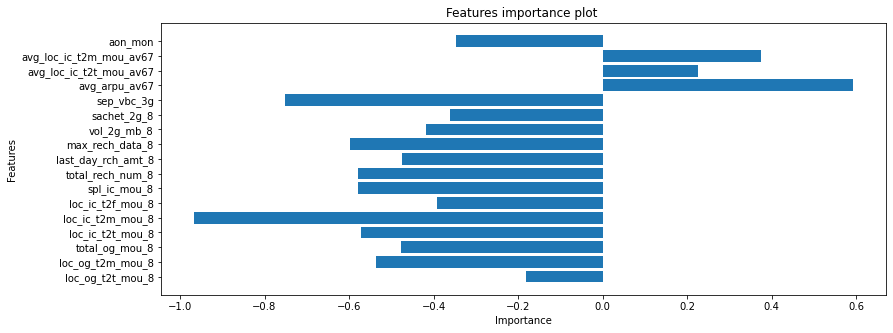

In [221]:
plt.figure(figsize=(13,5))
plt.barh(imp_df['Column-Name'],imp_df['Imp'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Features importance plot ")
plt.show()

In [223]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38612
Model:                            GLM   Df Residuals:                    38594
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14351.
Date:                Mon, 05 Jul 2021   Deviance:                       28703.
Time:                        15:34:21   Pearson chi2:                 1.08e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9229      0.028    -68.028      0.000      -1.978      -1.868
loc_og_t2t_mou_8           -0.1808      0.034     -5.257      0.000      -0.248      -0.113
loc_og_t2m_mou_8           -0.5363      0.038    -14.268      0.000      -0.610      -0.463
total_og_mou_8             -0.4775      0.024    -20.244      0.000      -0.524      -0.431
loc_ic_t2t_mou_8           -0.5722      0.047    -12.071      0.000      -0.665      -0.479
loc_ic_t2m_mou_8           -0.9688      0.051    -18.992      0.000      -1.069      -0.869
loc_ic_t2f_mou_8           -0.3916      0.033    -11.953      0.000      -0.456      -0.327
spl_ic_mou_8               -0.5796      0.029    -20.286      0.000      -0.636      -0.524
total_rech_num_8           -0.5782      0.024    -24.518      0.000      -0.624      -0.532
last_day_rch_amt_8         -0.4742      0.019    -24.605      0.000      -0.512      -0.436
max_rech_data_8            -0.5974      0.020    -30.096      0.000      -0.636      -0.558
vol_2g_mb_8                -0.4171      0.027    -15.312      0.000      -0.470      -0.364
sachet_2g_8                -0.3621      0.025    -14.700      0.000      -0.410      -0.314
sep_vbc_3g                 -0.7545      0.053    -14.352      0.000      -0.858      -0.651
avg_arpu_av67               0.5930      0.020     30.006      0.000       0.554       0.632
avg_loc_ic_t2t_mou_av67     0.2263      0.035      6.388      0.000       0.157       0.296
avg_loc_ic_t2m_mou_av67     0.3749      0.035     10.577      0.000       0.305       0.444
aon_mon                    -0.3475      0.019    -18.468      0.000      -0.384      -0.311
===========================================================================================
"""


Telecom company needs to pay attention to the average revenue generated per user for the months in good phase. 
To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.